Selección de características
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]

* Idenfiticar las características más importantes

* Remover irrelevantes o redundates

* Mejora la interpretavilidad y capacidad predictiva del modelo

## Técnicas

* Métodos de filtrado
    - Selección de las mejores características.
    - Desarrollo del modelo.
    - Análisis del desempeño.

* Basados en modelos
    - Desarrollo del modelo.
    - Selección de características basadas en el desempeño del modelo.
    - Selección backward, forward, mixtos.

* Métodos embebidos
    - Selección de un subconjunto de características.
    - Desarrollo del modelo.
    - Desempeño.
    - Retorno al paso 1.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

## VarianceThreshold()

In [4]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.3)
sel.fit_transform(X)[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

SelectKBest()
--

In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [2]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

Recursive Feature Elimination (RFE)
---

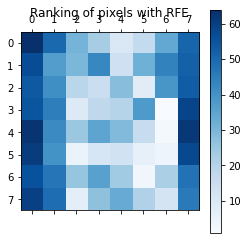

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

Optimal number of features : 3


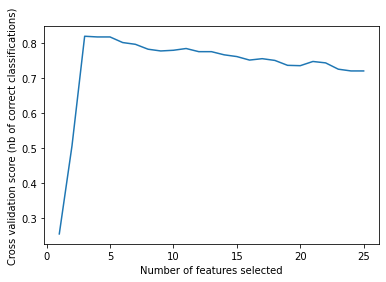

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

## Características correlacionadas

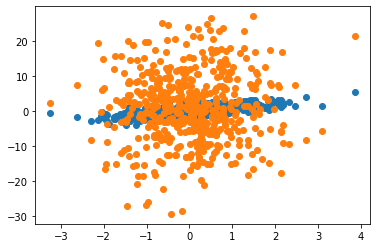

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

np.random.seed(42)
x1 = np.random.normal(0, 1, 500)
x2 = x1 + np.random.normal(0, 1, 500)
x3 = x1 + np.random.normal(0, 10, 500)

plt.scatter(x1, x2)
plt.scatter(x1, x3)

In [8]:
display(pearsonr(x1, x2), pearsonr(x1, x3))

(0.6811405918134971, 1.9520324398684079e-69)

(0.03937486620402585, 0.37962586391466446)

In [10]:
display(
    pearsonr(X[:, 0], X[:, 1]), pearsonr(X[:, 0], X[:, 2]), pearsonr(X[:, 0], X[:, 3])
)

(-0.11756978413300206, 0.15189826071144766)

(0.8717537758865831, 1.0386674194498099e-47)

(0.8179411262715756, 2.325498079793272e-37)

## Información mutua

In [11]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X, y)

array([0.48451775, 0.20941727, 0.99280814, 0.98327118])

## Chi-squared

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])